In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [58]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence



  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 812.02it/s]


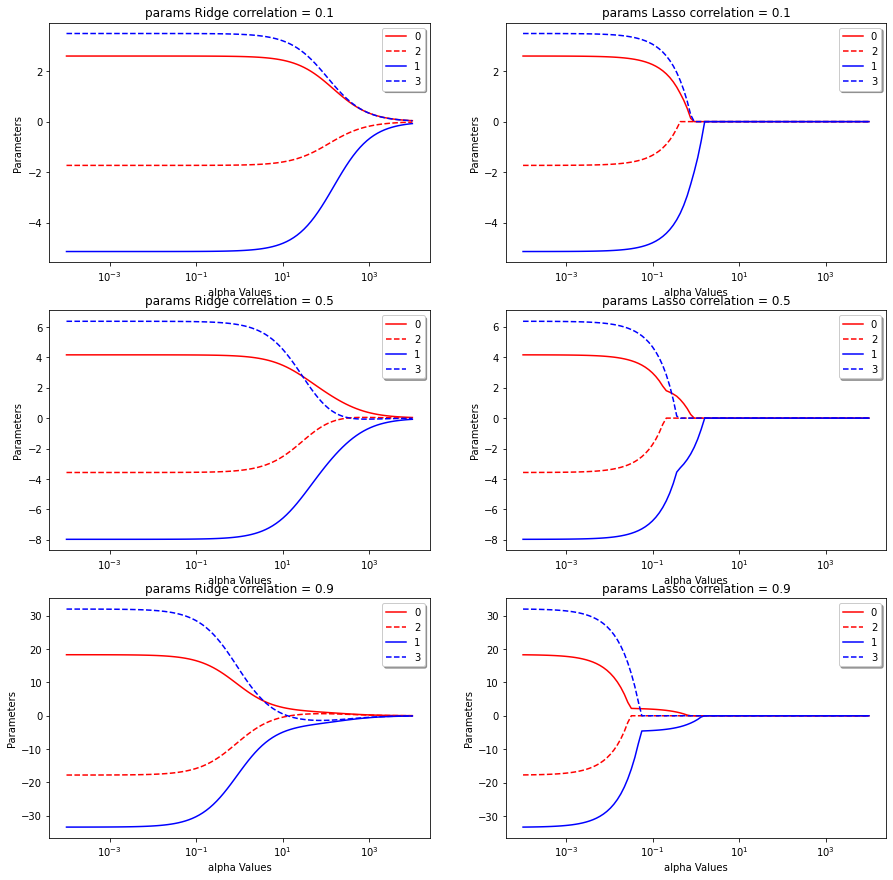

In [60]:
from tqdm import tqdm


fig, ax = plt.subplots(3, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

i = 0 


for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  j = 0

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)
  #print (alpha_values)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    rid = Ridge(alpha= alpha,fit_intercept=False)
    rid.fit(X, y)
    params_ridge.append(rid.coef_)

    las = Lasso(alpha= alpha,fit_intercept=False)
    las.fit(X, y)
    params_lasso.append(las.coef_)

  param0_rid = [item[0] for item in params_ridge]
  param1_rid = [item[1] for item in params_ridge]
  param2_rid = [item[2] for item in params_ridge]
  param3_rid = [item[3] for item in params_ridge]

  param0_las = [item[0] for item in params_lasso]
  param1_las = [item[1] for item in params_lasso]
  param2_las = [item[2] for item in params_lasso]
  param3_las = [item[3] for item in params_lasso]

  ax[i,j].plot(alpha_values, param0_rid, color='red', label='0')
  ax[i,j].plot(alpha_values, param2_rid, '--', color='red', label='2')

  ax[i,j].plot(alpha_values, param1_rid, color='blue', label='1')
  ax[i,j].plot(alpha_values, param3_rid, '--', color='blue', label='3')
  ax[i,j].set_xscale("log")

  legend = ax[i,j].legend(loc='upper right', shadow=True, fontsize='medium')
  ax[i,j].set(xlabel="alpha Values", ylabel="Parameters")
  ax[i, j].set_title('params Ridge correlation = ' + str(correlation))

  j = 1


  ax[i,j].plot(alpha_values, param0_las, color='red', label='0')
  ax[i,j].plot(alpha_values, param2_las, '--', color='red', label='2')

  ax[i,j].plot(alpha_values, param1_las, color='blue', label='1')
  ax[i,j].plot(alpha_values, param3_las, '--', color='blue', label='3')
  ax[i,j].set_xscale("log")


  legend = ax[i,j].legend(loc='upper right', shadow=True, fontsize='medium')
  ax[i,j].set(xlabel="alpha Values", ylabel="Parameters")
  ax[i,j].set_title('params Lasso correlation = '+ str(correlation))

  i = i+1

plt.show()


we can observe from the  Ridge plots above that when alpha takes really big values (strong regulization) , the regulization effect will dominates the squared loss function and the parameters will tend to reach zero, the more alpha tend to zero the more the solution tends towards the ordinary least squares.

we can observe the same in Lasso , but we can observe that lasso parameters actually reaches zero faster in a lesser values of alpha than it's counterpart in Ridge.

we can also see that the higher the correlation level the faster the parameters tends to zero in Ridge ( reaches zero in lasso) with increase of alpha (lesser values of alpha for the parameters to approch zero )
